# Imports

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


# 1. Problem Formulation

## 1.1 Load the files

In [2]:
lap_times_df= pd.read_csv('lap_times_mod.csv')
lap_times_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [3]:
lap_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB


In [4]:
drivers_df= pd.read_csv('drivers_mod.csv')
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [6]:
driver_standings_df= pd.read_csv('driver_standings_mod.csv')
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [7]:
driver_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [8]:
constructors_df= pd.read_csv('constructors_mod.csv')
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [9]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [10]:
constructor_standings_df= pd.read_csv('constructor_standings_mod.csv')
constructor_standings_df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [11]:
constructor_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB


In [12]:
constructor_results_df= pd.read_csv('constructor_results_mod.csv')
constructor_results_df.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [13]:
constructor_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11950 non-null  int64  
 1   raceId                11950 non-null  int64  
 2   constructorId         11950 non-null  int64  
 3   points                11950 non-null  float64
 4   status                11950 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 466.9+ KB


In [14]:
circuits_df= pd.read_csv('circuits_mod.csv')
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [15]:
circuits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


In [16]:
status_df= pd.read_csv('status_mod.csv')
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [17]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [18]:
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [19]:
seasons_df= pd.read_csv('seasons_mod.csv')
seasons_df.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


In [20]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    73 non-null     int64 
 1   url     73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [21]:
results_df= pd.read_csv('results_mod.csv')
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [22]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [23]:
races_df= pd.read_csv('races_mod.csv')
races_df.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [24]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


In [25]:
qualifying_df= pd.read_csv('qualifying_mod.csv')
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [26]:
qualifying_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB


In [27]:
pit_stops_df= pd.read_csv('pit_stops_mod.csv')
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [28]:
pit_stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8828 non-null   int64 
 1   driverId      8828 non-null   int64 
 2   stop          8828 non-null   int64 
 3   lap           8828 non-null   int64 
 4   time          8828 non-null   object
 5   duration      8828 non-null   object
 6   milliseconds  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB


## 1.2 Tables + Reason


results – grid position, driver/constructor IDs

races – Race context (date,time , raceId)

qualifying – what position the drivers got in the qualifying rounds

drivers – Driver nationality, age

constructors – Team nationality


## 1.3 Statement 

In Formula 1, securing a podium finish (finishing in the Top-3) is a critical performance milestone for drivers and constructors. It directly impacts championship standings, team morale, sponsor visibility, and strategic decision-making. Being able to predict podium outcomes before a race starts can help teams refine strategies, optimise resource allocation, and set realistic race goals.

This project aims to predict the likelihood of a driver achieving a podium finish in an upcoming race using historical data . 

By developing a classification model, this project demonstrates how data wrangling and machine learning can turn raw historical racing data into actionable pre-race insights for competitive advantage in motorsport.

# 2. Data Wrangling on Multiple Tables

In [29]:
#url
races_df["date"] = races_df["date"].astype(str).str.replace(r"/1(\d{4})$", r"/\1", regex=True)
races_df["date"] = pd.to_datetime(races_df["date"], errors="coerce")
races_df["year"] = races_df["date"].dt.year

url_year = races_df["url"].astype(str).str.extract(r"/(\d{4})_")[0].astype("Int64")
races_df["year"] = races_df["year"].fillna(url_year)


In [30]:
# --- Deduplicate qualifying to one row per (raceId, driverId) ---
qual_one = (
    qualifying_df[["raceId", "driverId", "position"]]
    .rename(columns={"position": "qual_position"})
    .dropna(subset=["qual_position"])
    .sort_values(["raceId", "driverId", "qual_position"])
    .drop_duplicates(["raceId", "driverId"], keep="first")
)


In [31]:
#the spine of merged df
df = results_df.copy()

# Race context
merge_race_cols = ["raceId","round"]
if "year" in races_df.columns: merge_race_cols.append("year")
if "date" in races_df.columns: merge_race_cols.append("date")

df = df.merge(races_df[merge_race_cols], on="raceId", how="inner")

# qualifying_df
df = df.merge(qual_one, on=["raceId","driverId"], how="inner")

# drivers_df
drivers_df = drivers_df.copy()
drivers_df["dob"] = pd.to_datetime(drivers_df["dob"], errors="coerce")
df = df.merge(
    drivers_df[["driverId","dob","nationality"]]
      .rename(columns={"nationality":"driver_nationality"}),
    on="driverId", how="inner"
)

# constructors_df
df = df.merge(
    constructors_df[["constructorId","nationality"]]
      .rename(columns={"nationality":"constructor_nationality"}),
    on="constructorId", how="inner"
)

#create new feature of calculating age
if "year" in df.columns:
    df["driver_age"] = (df["year"] - df["dob"].dt.year).astype("Int64")


In [32]:
# target
df["is_podium"] = (df["positionOrder"] <= 3).astype(int)


# Actions done to drop useless/repeated columns
df = df.drop(columns=['resultId','dob','position','number','time','fastestLap', 'rank', 'fastestLapSpeed','round','date','fastestLapTime','points','positionText','positionOrder'])


# --- Preview ---
print(df.shape)
df.head(10)


(9134, 13)


,raceId,driverId,constructorId,grid,laps,milliseconds,statusId,year,qual_position,driver_nationality,constructor_nationality,driver_age,is_podium
0,18,1,1,1,58,5690616,1,2008.0,1,British,British,23,1
1,18,2,2,5,58,5696094,1,2008.0,5,German,German,31,1
2,18,3,3,7,58,5698779,1,2008.0,7,German,British,23,1
3,18,4,4,11,58,5707797,1,2008.0,12,Spanish,French,27,0
4,18,5,1,3,58,5708630,1,2008.0,3,Finnish,British,27,0
5,18,6,3,13,57,\N,11,2008.0,14,Japanese,British,23,0
6,18,7,5,17,55,\N,5,2008.0,18,French,Italian,29,0
7,18,8,6,15,53,\N,5,2008.0,16,Finnish,Italian,29,0
8,18,9,2,2,47,\N,4,2008.0,2,Polish,German,24,0
9,18,10,7,18,43,\N,3,2008.0,9,German,Japanese,26,0


In [33]:
#make \n null
df.replace('\"N', np.nan, inplace=True)

In [34]:
# ensure numeric
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors='coerce')


In [35]:
print(df.shape)
df.head(10)

(9134, 13)


,raceId,driverId,constructorId,grid,laps,milliseconds,statusId,year,qual_position,driver_nationality,constructor_nationality,driver_age,is_podium
0,18,1,1,1,58,5690616.0,1,2008.0,1,British,British,23,1
1,18,2,2,5,58,5696094.0,1,2008.0,5,German,German,31,1
2,18,3,3,7,58,5698779.0,1,2008.0,7,German,British,23,1
3,18,4,4,11,58,5707797.0,1,2008.0,12,Spanish,French,27,0
4,18,5,1,3,58,5708630.0,1,2008.0,3,Finnish,British,27,0
5,18,6,3,13,57,NaN,11,2008.0,14,Japanese,British,23,0
6,18,7,5,17,55,NaN,5,2008.0,18,French,Italian,29,0
7,18,8,6,15,53,NaN,5,2008.0,16,Finnish,Italian,29,0
8,18,9,2,2,47,NaN,4,2008.0,2,Polish,German,24,0
9,18,10,7,18,43,NaN,3,2008.0,9,German,Japanese,26,0


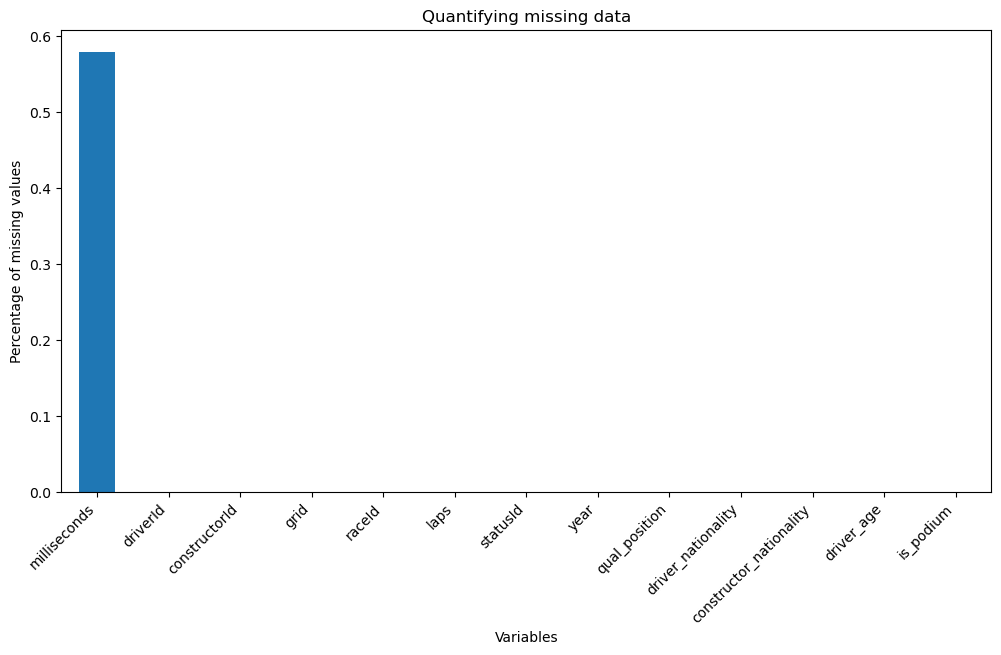

In [36]:
#shows the missing data
missing_values = df.isnull().mean().sort_values(ascending=False)

missing_values.plot.bar(figsize=(12, 6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

plt.xticks(rotation=45, ha='right')  # Rotate and align labels

plt.show()

In [37]:
df.isnull().mean().sort_values(ascending=False)

milliseconds               0.579264
driverId                   0.000000
constructorId              0.000000
grid                       0.000000
raceId                     0.000000
laps                       0.000000
statusId                   0.000000
year                       0.000000
qual_position              0.000000
driver_nationality         0.000000
constructor_nationality    0.000000
driver_age                 0.000000
is_podium                  0.000000
dtype: float64

In [38]:

df = df[df["statusId"] == 1]

In [39]:
df = df.drop(columns=['statusId'])

In [40]:
df.isnull().mean().sort_values(ascending=False)

raceId                     0.0
driverId                   0.0
constructorId              0.0
grid                       0.0
laps                       0.0
milliseconds               0.0
year                       0.0
qual_position              0.0
driver_nationality         0.0
constructor_nationality    0.0
driver_age                 0.0
is_podium                  0.0
dtype: float64

In [41]:
df

,raceId,driverId,constructorId,grid,laps,milliseconds,year,qual_position,driver_nationality,constructor_nationality,driver_age,is_podium
0,18,1,1,1,58,5690616.0,2008.0,1,British,British,23,1
1,18,2,2,5,58,5696094.0,2008.0,5,German,German,31,1
2,18,3,3,7,58,5698779.0,2008.0,7,German,British,23,1
3,18,4,4,11,58,5707797.0,2008.0,12,Spanish,French,27,0
4,18,5,1,3,58,5708630.0,2008.0,3,Finnish,British,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9121,1073,846,1,3,58,5476545.0,2021.0,3,British,British,22,0
9122,1073,4,214,11,58,5479053.0,2021.0,11,Spanish,French,40,0
9123,1073,839,214,9,58,5481371.0,2021.0,9,French,French,25,0
9124,1073,844,6,7,58,5483402.0,2021.0,7,Monegasque,Italian,24,0


# 3. Data Cleansing and Transformation

In [42]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_podium']), df['is_podium'], test_size=0.2, random_state=42)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 989 to 7779
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   3069 non-null   int64  
 1   driverId                 3069 non-null   int64  
 2   constructorId            3069 non-null   int64  
 3   grid                     3069 non-null   int64  
 4   laps                     3069 non-null   int64  
 5   milliseconds             3069 non-null   float64
 6   year                     3069 non-null   Float64
 7   qual_position            3069 non-null   int64  
 8   driver_nationality       3069 non-null   object 
 9   constructor_nationality  3069 non-null   object 
 10  driver_age               3069 non-null   Int64  
dtypes: Float64(1), Int64(1), float64(1), int64(6), object(2)
memory usage: 293.7+ KB


In [44]:
unique_values = X_train.nunique()
print(unique_values)

raceId                      425
driverId                     97
constructorId                37
grid                         25
laps                         37
milliseconds               3065
year                         28
qual_position                24
driver_nationality           25
constructor_nationality      13
driver_age                   26
dtype: int64


In [45]:
cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
num_cols = [c for c in X_train.columns if X_train[c].dtypes!='O']

In [46]:
X_train[cat_cols]

,driver_nationality,constructor_nationality
989,Italian,French
4423,Brazilian,British
810,Colombian,British
7721,Dutch,Austrian
5859,German,Austrian
...,...,...
3304,British,Italian
3915,Polish,German
2137,Finnish,British
8501,Australian,French


In [47]:
X_train[num_cols]

,raceId,driverId,constructorId,grid,laps,milliseconds,year,qual_position,driver_age
989,64,21,4,5,67,5296493.0,2006.0,5,33
4423,351,22,3,6,61,7129680.0,2010.0,6,38
810,56,31,1,7,62,5482354.0,2006.0,7,31
7721,999,830,9,4,67,5557499.0,2018.0,4,21
5859,899,20,9,1,71,5556300.0,2013.0,1,26
...,...,...,...,...,...,...,...,...,...
3304,255,65,22,9,53,5896734.0,1995.0,9,31
3915,9,9,2,16,60,5872865.0,2009.0,16,25
2137,121,8,1,4,53,4472672.0,2003.0,4,24
8501,1038,817,4,7,53,6434447.0,2020.0,7,31


### Encoding categorical columns

In [48]:
from feature_engine.encoding import MeanEncoder
mean_enc = MeanEncoder(variables=cat_cols)
mean_enc.fit(X_train, y_train)

,variables,"['driver_nationality', 'constructor_nationality']"
,missing_values,'raise'
,ignore_format,False
,unseen,'ignore'
,smoothing,0.0


In [49]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

C:\Users\User\anaconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) driver_nationality, constructor_nationality.
  warnings.warn(


In [50]:
X_train[cat_cols]

,driver_nationality,constructor_nationality
989,0.137405,0.235556
4423,0.253165,0.284553
810,0.529412,0.284553
7721,0.416667,0.402778
5859,0.357143,0.402778
...,...,...
3304,0.426614,0.395714
3915,0.215686,0.470000
2137,0.434251,0.284553
8501,0.302083,0.235556


### Winsorize

grid


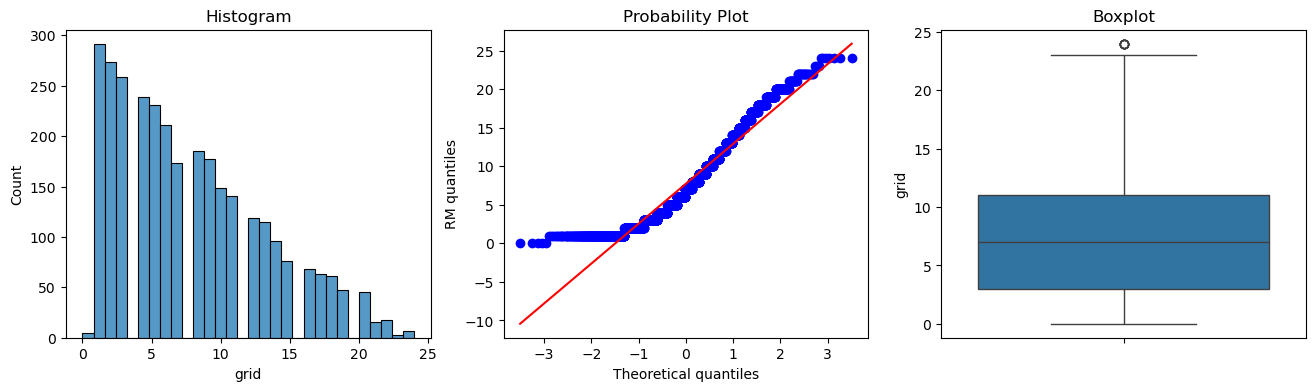

laps


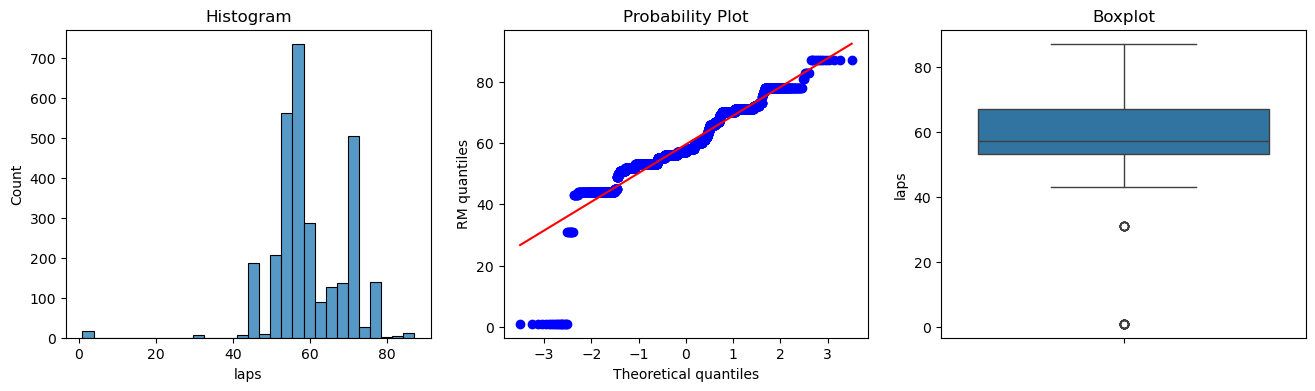

milliseconds


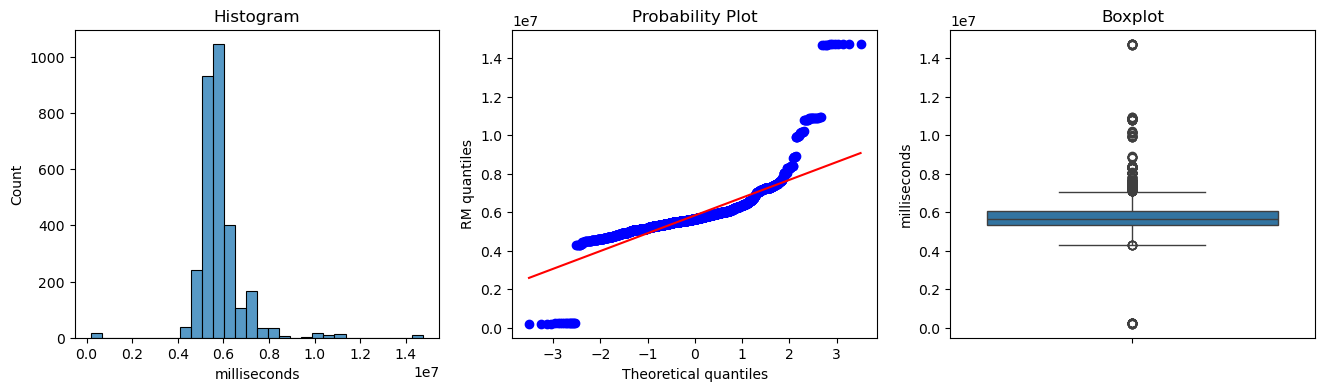

year


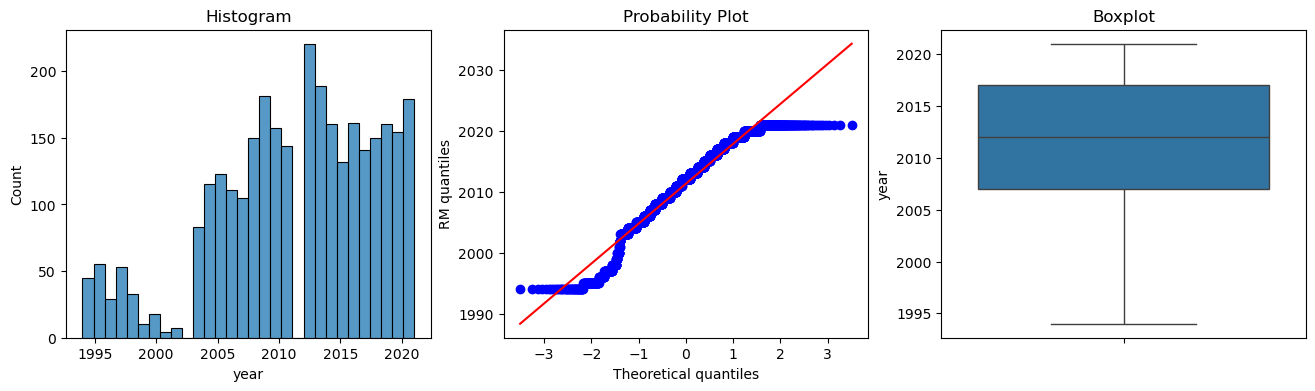

qual_position


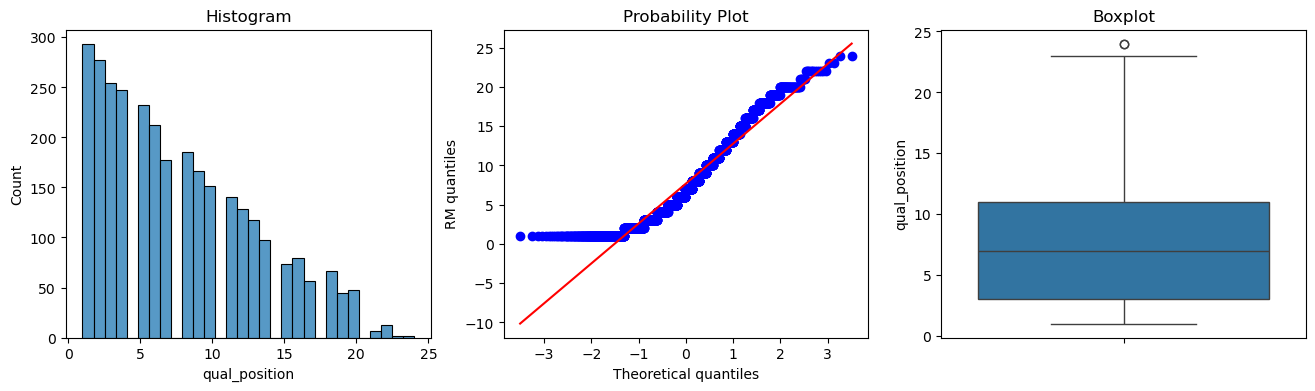

driver_age


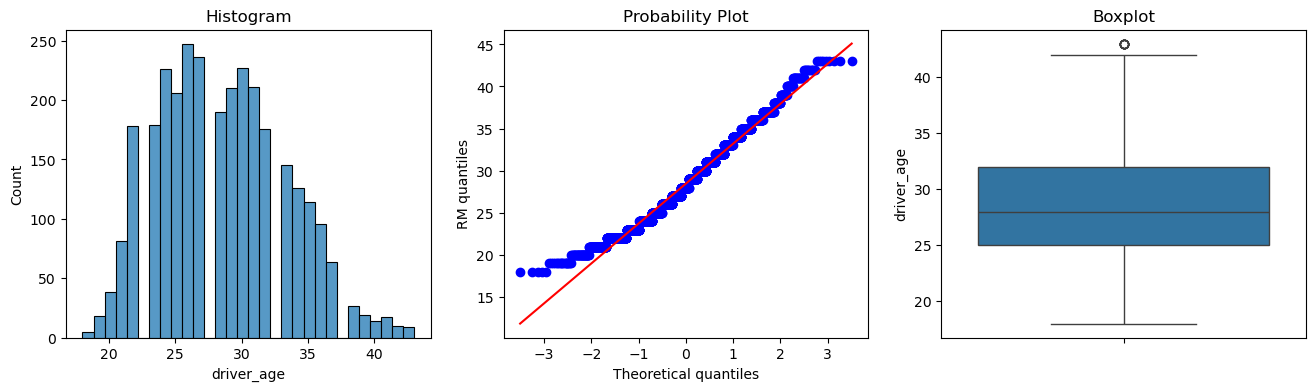

In [51]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()
plot_col = ['grid','laps','milliseconds','year', 'qual_position','driver_age']
for each in plot_col:
    print(each)
    diagnostic_plots(X_train, each)

In [52]:
winsorizer = Winsorizer(capping_method='gaussian',
                          tail='left', 
                          fold=3,
                          variables=['laps','milliseconds'])

winsorizer.fit(X_train)

X_train = winsorizer.transform(X_train)
X_test = winsorizer.transform(X_test)


In [53]:
### Feature engineering

In [54]:

X_train['laps_per_min'] = X_train['laps'] / (X_train['milliseconds'] / 60000)
X_test['laps_per_min'] = X_test['laps'] / (X_test['milliseconds'] / 60000)


### Transformation of numerical columns

In [55]:
log_cols = ['driver_age']

#'laps_per_minute'
# Apply log transformation to each column in the list
for col in log_cols:
    # Make sure there are no zero or negative values before applying log
    if (X_train[col] <= 0).any():
        print(f"Warning: Column '{col}' contains non-positive values. Log transformation cannot be applied.")
    else:
        X_train[col] = np.log(X_train[col])
for col in log_cols:
    # Make sure there are no zero or negative values before applying log
    if (X_test[col] <= 0).any():
        print(f"Warning: Column '{col}' contains non-positive values. Log transformation cannot be applied.")
    else:
        X_test[col] = np.log(X_test[col])

# Display the transformed dataframe
print(X_test[log_cols].head())

      driver_age
3206    3.433987
3933    3.178054
1974    3.526361
3639    3.135494
6900    3.433987


In [56]:
# Fit transformer only on train_df
yjt_cols = ['grid','qual_position','laps','milliseconds']
yjt = YeoJohnsonTransformer(variables=yjt_cols)
yjt.fit(X_train)

# Transform both train and test
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

grid


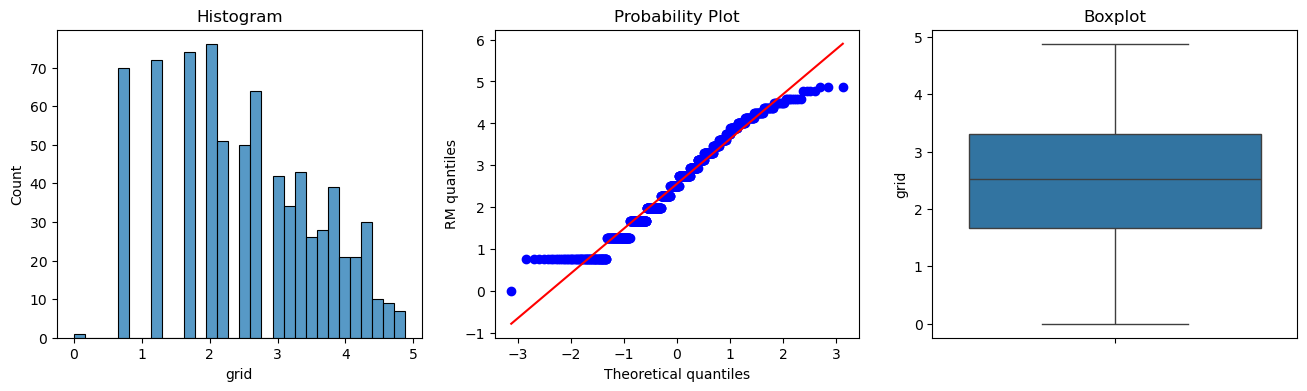

qual_position


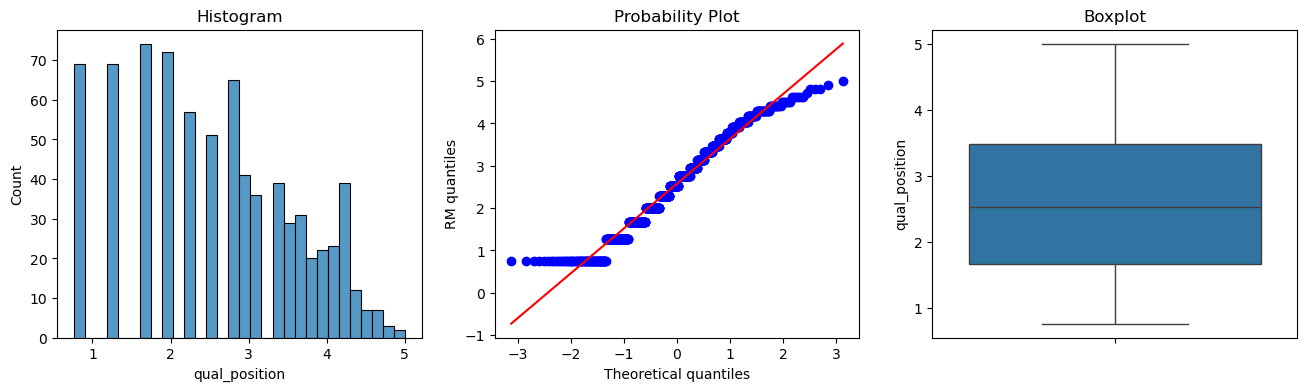

laps


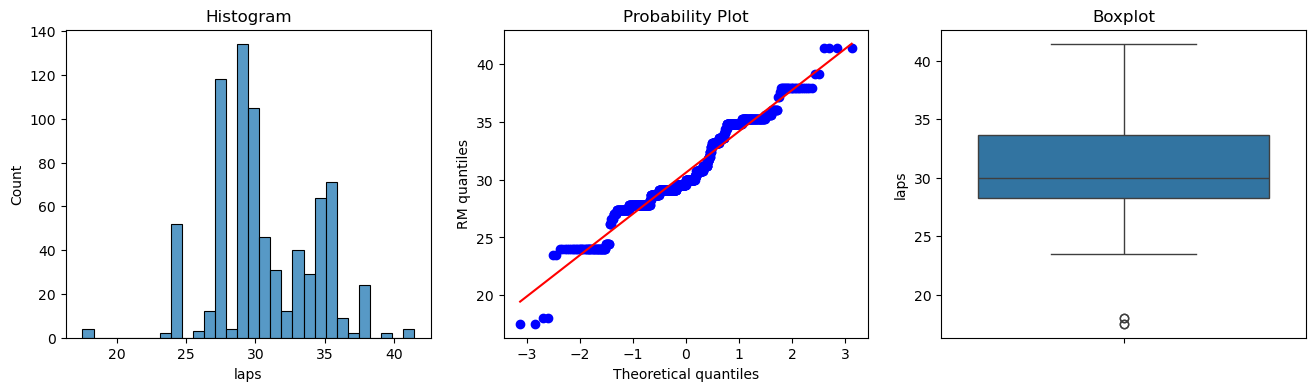

milliseconds


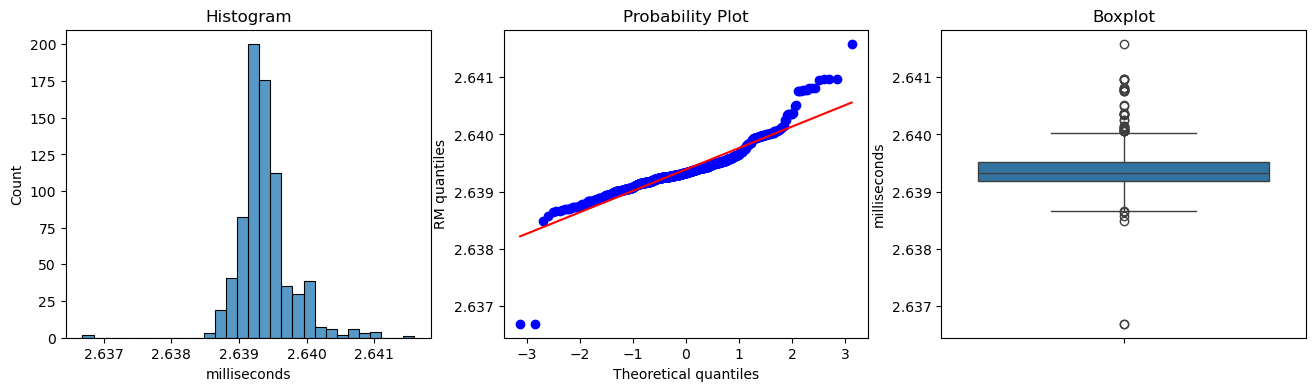

In [57]:
for each in yjt_cols:
    print(each)
    diagnostic_plots(X_test, each)

In [58]:
X_test.fillna(0, inplace=True)
print(X_test.isnull().sum())

raceId                     0
driverId                   0
constructorId              0
grid                       0
laps                       0
milliseconds               0
year                       0
qual_position              0
driver_nationality         0
constructor_nationality    0
driver_age                 0
laps_per_min               0
dtype: int64


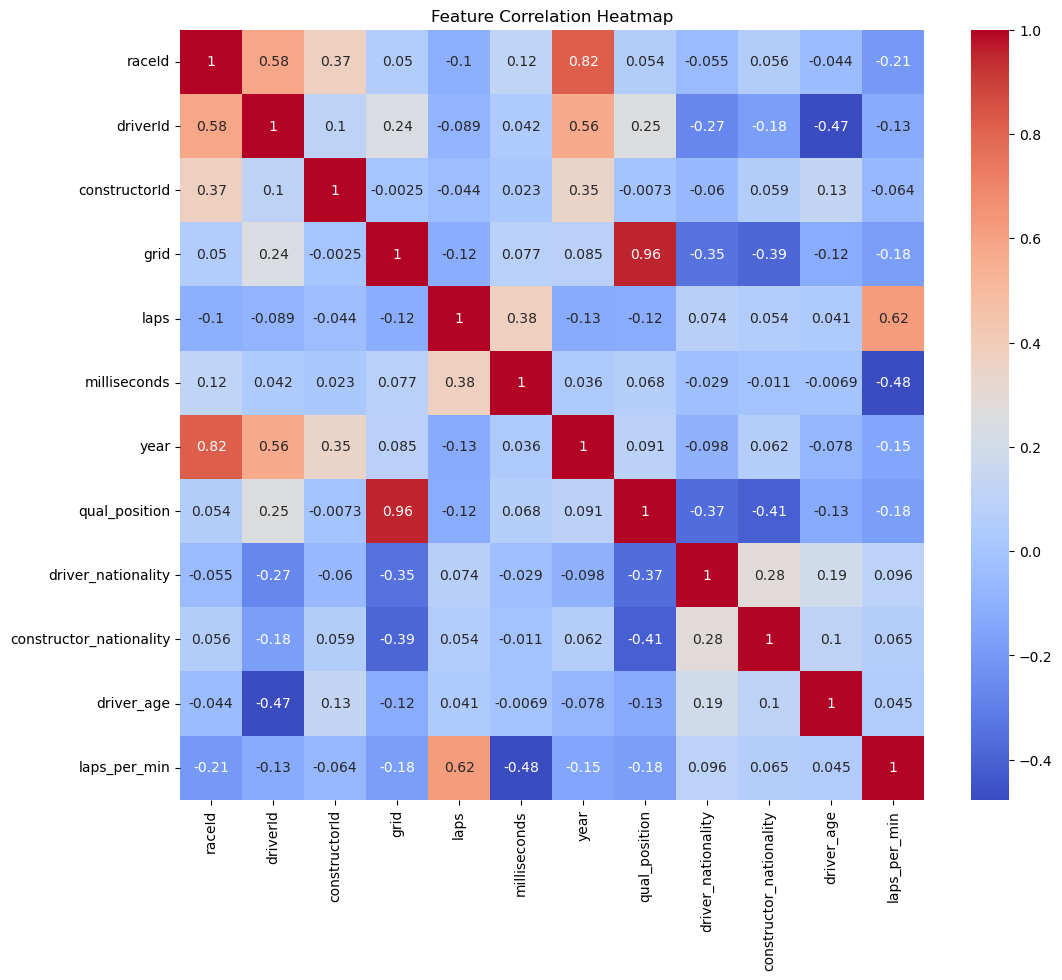

In [59]:
corr_matrix = X_train.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Scaler

In [60]:

# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [61]:
X_train_scaled

,raceId,driverId,constructorId,grid,laps,milliseconds,year,qual_position,driver_nationality,constructor_nationality,driver_age,laps_per_min
0,-0.930716,0.000000,-0.181818,-0.261077,0.709117,-0.539470,-0.6,-0.261053,-1.266869,-0.440776,0.665572,1.044387
1,-0.599307,0.001241,-0.272727,-0.123545,0.286583,1.840102,-0.2,-0.123570,-0.599472,0.000000,1.237064,-0.735574
2,-0.939954,0.012407,-0.454545,0.000000,0.357597,-0.249443,-0.6,0.000000,0.993191,0.000000,0.412309,0.461427
3,0.148961,1.003722,0.272727,-0.416974,0.709117,-0.136001,0.6,-0.416794,0.343176,1.063543,-1.165365,0.786096
4,0.033487,-0.001241,0.272727,-1.100341,0.986323,-0.137795,0.1,-1.098084,0.000000,1.063543,-0.300202,1.100214
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,-0.710162,0.054591,1.454545,0.215995,-0.290883,0.350991,-1.7,0.216187,0.400528,1.000000,0.412309,-0.547651
3065,-0.994226,-0.014888,-0.363636,0.781319,0.215321,0.318000,-0.3,0.782845,-0.815547,1.668269,-0.459081,-0.013565
3066,-0.864896,-0.016129,-0.454545,-0.416974,-0.290883,-2.017071,-0.9,-0.416794,0.444554,0.000000,-0.624446,0.696516
3067,0.193995,0.987593,-0.181818,0.000000,-0.290883,1.048695,0.8,0.000000,-0.317438,-0.440776,0.412309,-0.874206


In [62]:
X_test_scaled

,raceId,driverId,constructorId,grid,laps,milliseconds,year,qual_position,driver_nationality,constructor_nationality,driver_age,laps_per_min
0,-0.714781,0.054591,1.454545,0.112491,-0.290883,-1.559045,-1.7,0.112568,0.400528,1.000000,0.412309,0.439091
1,-0.993072,-0.011166,-0.181818,0.641059,0.917340,0.458415,-0.3,0.714131,-0.599472,-0.440776,-0.624446,0.637814
2,-0.874134,0.011166,0.000000,-1.100341,0.848147,-0.955218,-0.9,-1.098084,0.000000,1.000000,0.786502,1.491033
3,-0.693995,-0.008685,-0.272727,-0.598251,0.986323,0.895425,-1.8,-0.597749,0.400528,0.000000,-0.796849,0.436087
4,0.102771,-0.024814,11.363636,-0.817364,0.709117,-0.307865,0.4,-0.816259,0.400528,1.668269,0.412309,0.895174
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.230947,1.018610,18.818182,-0.261077,0.986323,0.468615,0.9,-0.261053,-1.119756,1.000000,-0.459081,0.704060
764,-0.939954,0.000000,-0.181818,0.401749,0.357597,-0.212477,-0.6,0.402251,-1.266869,-0.440776,0.665572,0.439702
765,-0.996536,-0.014888,-0.363636,0.312031,0.072035,-0.644876,-0.3,0.312367,-0.815547,1.668269,-0.459081,0.365142
766,-0.724018,0.011166,1.454545,-1.100341,0.569202,0.016114,-1.7,-1.098084,0.000000,1.000000,-0.300202,0.537102


Total rows : 3837 rows 12 columns

# 4. Machine Learning Modelling

In [63]:
lg = LogisticRegression(solver='saga', max_iter=20000)
lg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,20000
,multi_class,'deprecated'


In [64]:
print(lg.score(X_train,y_train), ' Train accuracy')

0.793743890518084  Train accuracy


In [65]:
y_fitted = lg.predict(X_train)
y_fitted_prob = lg.predict_proba(X_train)[:,0]

In [66]:
print(lg.score(X_test, y_test), ' Test accuracy')

0.7942708333333334  Test accuracy


# 5. Report

## Table of Content

This report is structured into seven main sections to provide a clear and logical flow of the data wrangling process and subsequent analysis. It begins with an Introduction, where the broader context of the problem is explained, alongside the value of predicting race outcomes in Formula 1. The next section on Problem Formulation describes the exploration of the provided datasets, the understanding gained from them, and the formulation of a prediction problem that guides the rest of the work.

Following this, the section on Data Wrangling outlines how multiple tables from the Formula 1 database were combined and transformed into a single, dataset suitable for modeling. The following section, Data Cleansing and Transformation, explains the steps taken to handle missing values, outliers, categorical variables, and skewed numerical features in order to prepare the data for machine learning.

The report then moves on to Machine Learning Modeling and their performance is evaluated in order to assess the predictive power of the wrangled dataset. In the Summary and Further Improvements section, the findings from the analysis are consolidated, the limitations are discussed, and possible avenues for refinement and extension are proposed. Finally, the report concludes with a Reflection, where the learning journey throughout the module is reviewed in light of personal growth, key takeaways, and connections to other areas of study.

## Introduction with Value Based Problem Statement 

In Formula 1, predicting race outcomes has significant value for multiple stakeholders, including teams, sponsors, and fans. For teams, the ability to estimate the likelihood of a driver achieving a podium finish provides a competitive edge. Such insights can guide pre-race strategies, inform pit stop decisions, and help optimize resource allocation across drivers and constructors. Sponsors also benefit from these predictions because podium finishes directly influence visibility, media coverage, and return on investment. For fans, predictive analytics add a new layer of engagement by turning raw statistics into meaningful expectations, making the sport more interactive and data-driven.

The dataset used in this assignment is derived from the Ergast F1 database, which contains a rich history of Formula 1 data spanning multiple decades. It captures intricate details such as race results, qualifying performance, pit stops, lap times, driver demographics, and constructor information. This vast archive of structured racing data presents an opportunity to frame a meaningful predictive task: determining the likelihood that a driver will secure a podium finish in a given race. Unlike simple descriptive statistics, which summarize what has already occurred, this assignment focuses on building predictive models that can anticipate future events.

The value of this problem lies in the transformation of raw racing history into actionable insights through systematic data wrangling and machine learning. By cleaning, merging, and engineering features from multiple data tables, we create a dataset that reflects not only outcomes but also the factors that shape them. This forward-looking approach demonstrates the importance of data wrangling as a bridge between unrefined information and predictive analytics. It highlights how careful preparation of data enables the application of machine learning methods to produce realistic, meaningful predictions that extend beyond sports into broader domains where decision-making under uncertainty is critical.

## Problem Formulation 

This dataset is highly comprehensive, consisting of thirteen tables that capture different aspects of the sport. Among these are tables covering race results, details of the races themselves, qualifying sessions, driver information, constructor or team details, pit stop records, and more. Each table offers a unique perspective on race performance, and together they form a relational database that provides a complete historical record of the sport. To make effective use of this data, it was first necessary to review the accompanying data dictionary and conduct an exploratory analysis of each table. Through this exploration, a number of potential predictors were identified. Variables such as the starting grid position, performance in qualifying sessions, driver demographics including age and nationality, as well as team-level information such as constructor identity and nationality, were all highlighted as features that could influence race outcomes.

The task was framed as a binary classification problem, where the objective was to determine whether a driver would achieve a podium finish in a coming race. The target variable was therefore created to take the value of one if the driver finished in the top three positions and zero otherwise. In constructing this problem, several key tables contributed directly to the modeling dataset. The results table provided essential outcome variables, including finishing positions and points scored. The qualifying table added depth by supplying data on grid positions and timing, which serve as strong indicators of race-day potential. The drivers table contributed demographic attributes such as age, which was computed relative to the year of the race, and nationality. The constructors table introduced team-specific context, identifying the constructor and its background. Finally, the races table was merged to provide additional details such as the season and the round number, ensuring that the temporal and contextual dimensions of the data were preserved. Together, these tables enabled the formulation of a prediction problem centered on forecasting podium finishes.

## Data Wrangling on multiple tables 

The process of constructing the final dataset required careful integration of multiple tables. I chose 5 tables:results,races,qualifying,drivers and constructors.

The results table was first merged with the races table to provide temporal context, linking each driver’s performance to the specific season and round. This was followed by a join with the qualifying table using both the race and driver identifiers, which enriched the dataset with information about grid position and qualifying times. Next, the drivers table was integrated to provide demographic variables, most importantly the driver’s age, which was calculated from their date of birth relative to the year of the race. Finally, the constructors table was merged to bring in team-level features, such as constructor nationality, which offered an additional layer of context for analyzing competitive performance.

During the wrangling stage, I applied a filter using statusId == 1 to ensure that only rows corresponding to completed races with valid timings were retained. This step was important because including incomplete or invalid race data could have introduced noise and biased the model’s learning process. By narrowing the dataset to finished races, the resulting features more accurately reflected meaningful performance rather than disqualifications, retirements, or other anomalies.

At this point, several new features were engineered to improve predictive power. Driver age was represented as a continuous numerical variable, grid position was treated as a direct indicator of competitive advantage, and qualifying times were normalized to allow comparisons across different races. Categorical attributes such as constructor nationality were also prepared for later encoding. By the end of this stage, the original relational database had been transformed into a consolidated, high-quality tabular dataset, where each row represented a valid driver–race combination enriched with carefully selected explanatory variables ready for machine learning.

## Data Cleansing and Transformation 

Once the final dataset was constructed, the next stage focused on data cleansing and transformation to ensure that it was reliable, consistent, and suitable for machine learning. Even after careful wrangling, the dataset contained missing values, outliers, categorical variables, and skewed numerical distributions that needed to be addressed. Without proper cleansing, these issues could have negatively affected the quality of the model, either by biasing results or reducing predictive accuracy.

Firstly. I already split the data into train and test samples in order to prevent data leakage.

The second task was to handle missing values, which appeared most frequently in the qualifying data. Some drivers did not record qualifying times due to technical problems or disqualifications. To prevent large portions of data from being discarded, these missing values were imputed with median values. This ensured that the dataset remained as complete as possible without introducing major distortions.

Outliers were another important concern. laps and milliseconds were winsorised to prevent them from disproportionately influencing the model. Filtering with statusId == 1 already reduced much of this noise, but additional manual checks were necessary to guarantee that the dataset represented realistic race outcomes.

Categorical variables, particularly constructor nationality and driver nationality, required transformation before they could be used in Classification model . Since both variables had many unique categories, traditional one-hot encoding would have created unnecessary dimensionality. To address this, mean encoding was applied, which replaced each category with the average target rate, making the variables both compact and informative.

Numerical features were also transformed. Highly skewed attributes such as milliseconds were log-transformed to reduce skewness, while grid position and driver age were normalized using Yeo-Johnson transformation. Finally, robust scaling was applied across the dataset to minimize the influence of outliers while keeping features on a consistent scale. These steps together ensured that the dataset was clean, well-balanced, and properly structured for effective logistic regression modeling.

## Machine modelling

After the data had been wrangled, cleansed, and transformed, the next stage was to build and evaluate the machine learning model.
For the machine modelling part. I used the Logistic Regression model.This algorithm was chosen because it is simple, interpretable, and well-suited for binary classification problems such as predicting podium versus non-podium finishes. Once trained on the dataset, the logistic regression model demonstrated its ability to identify meaningful patterns in the data. My train accuracy was 79.3% while my test accuracy was 79.4% which showed that the model was neither overfitting nor underfitting, making me think that the accuracy was okay.

## Summary and Further Improvements

The analysis carried out in this assignment demonstrated the importance of data wrangling in transforming raw information into a form suitable for predictive modeling. Beginning with thirteen tables in the Ergast Formula 1 database, a carefully chosen subset of five tables—results, races, qualifying, drivers, and constructors—was integrated to construct the final dataset. Through this process, the data was reshaped into a coherent structure that allowed meaningful insights to be drawn. The subsequent steps of cleansing and transformation ensured that the dataset was robust, addressing missing values, outliers, categorical variables, and skewed numerical distributions. These preparation efforts laid the foundation for the machine learning model to perform effectively.

The logistic regression model produced promising results.This demonstrated that, even with a relatively simple model, the wrangled dataset contained sufficient information to capture some of the underlying patterns in Formula 1 performance. The features that contributed most strongly to the model—grid position, qualifying performance, driver age, and constructor nationality—also aligned with common knowledge about factors that influence race outcomes, reinforcing the reliability of the results.

Despite these successes, several limitations were identified. Class imbalance remained a major challenge, as podium finishes are rare compared to non-podium outcomes. This imbalance reduced the model’s sensitivity and limited its ability to identify all true podium drivers. Furthermore, only one modeling approach was tested, which restricted opportunities to compare performance across different algorithms. The dataset also lacked dynamic, race-day variables such as pit stop strategy, tyre choice, or weather, which are known to significantly influence results.

Future work could address these limitations in several ways. Techniques such as class weighting or oversampling could help balance the dataset. Additional feature engineering, especially the inclusion of rolling averages of driver form or contextual race-day factors, could further improve the richness of the dataset. Together, these improvements could enhance both the accuracy and the practical value of the predictions, moving closer to a reliable tool for forecasting race outcomes.

## Reflection

From this module, i learnt the many different techniques to apply data wrangling on uncleaned datasets.Examples are the different encoding, imputation methods, outlier trimming and then standardisation of data. I feel that this is very useful in the future for me as i believe my future jobs will require me to be able to clean the datasets and then transform them and put them in a model to help make my superiors to make better data-supported decisions.
What surprised me the most in the module was that the fact that for example log transformation can only be used for right skewed positive variables. Different methods had different conditions to consider. If done wrongly, this could lead to data leakage or model failure which leads to inaccuracy in machine learning models.
What helped me to improve my learning process was definitely chatgpt and turbo.ai. Chatgpt has always assisted me in understanding the content of the data wrangling. If i had any doubts about the content that i was learning, i would ask it straight away as it provided me detailed explanation which have boosted my learning. There was a period of time when i had trouble trying to understand the usefulness of standardising data such as robust scalers and chatgpt explained it in such a way where it was easy to understand. As for Turbo.ai, when i put the lecture powerpoint slides into the ai, it would make learning materials such as flashcards and quizzes for each chapters. This has greatly helped me to  track my learning and has always prepared me for quizzes in the module.
The data wrangling model is closely related to the Machine learning module. When i was doing my machine learning module assignment before data wrangling assignment, i also had to first clean the data first and therefore when i started my data wrangling assignment, it was not that hard to complete it as i already understood the steps taken and i just needed to apply it.
I feel like in jobs such as data analysts, data scientist, finance and banking are where data wrangling is most needed. For data analyst, I will have to deal with raw sales data, customer data, or operational logs that come from multiple sources. Before you can build dashboards or reports, I will need to wrangle the data, such as removing duplicates, handling missing values, merging multiple tables , and transforming them into clean datasets for visualization in tools like Tableau, Power BI, or SAP Analytics Cloud.
Banks and investment companies deal with messy transaction data, customer spending patterns, and credit histories. Data wrangling is used to detect fraud, assess credit risk, and feed accurate data into financial models.
Marketing teams collect customer data from multiple touchpoints . Wrangling helps combine and clean this information to understand customer behavior, predict churn, or segment audiences.
In conclusion, data wrangling is an essential skill for anyone aspiring to work in data-driven fields, as it provides the foundation for transforming messy, raw information into clean, structured datasets that enable meaningful analysis and reliable decision-making.